In [1]:
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

from mendikot import Mendikot
from rlplayer import RLPlayer
from human_player import HumanPlayer

In [2]:
class QLearning(torch.nn.Module):
        def __init__(self):
            super(QLearning, self).__init__()
            self.a0 = torch.nn.Linear(2704,2704)
            self.a1 = torch.nn.Linear(2704,1800)
            self.a2 = torch.nn.Linear(1800,1200)
            self.a3 = torch.nn.Linear(1200,800)
            self.a4 = torch.nn.Linear(800,500)
            self.a5 = torch.nn.Linear(500,300)
            self.a6 = torch.nn.Linear(300,104)
            self.a7 = torch.nn.Linear(104,52)
            self.a8 = torch.nn.Linear(52,52)
            
        def forward(self, x):
            x = self.a0(x)
            x = self.a1(x)
            x = self.a2(x)
            x = self.a3(x)
            x = self.a4(x)
            x = self.a5(x)
            x = self.a6(x)
            x = self.a7(x)
            x = self.a8(x)
            return x

model = QLearning()
criterion = torch.nn.L1Loss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.0005, amsgrad = True)

In [3]:
epoch = 100
loss_arr = []
print('Training...')

for epoch in range(epoch):
  model.eval()
  X = []
  y = []
  for game in range(20):
    # Generating Q data
    model_dict = {'model': model,
                'optimizer' : optimizer,
                'criterion' : criterion,
                'learning' : True,
                'state' : [],
                'actual' : [],
              }
    M = Mendikot(RLPlayer,RLPlayer,RLPlayer,RLPlayer,model_dict)
    M.players[0].play()
    X += model_dict['state'] 
    y += model_dict['actual']
    #print("Game",game)
  # Training on Q data
  model.train()
  optimizer.zero_grad()
  X_train = torch.squeeze(torch.FloatTensor(X))
  y_train = torch.squeeze(torch.FloatTensor(y))
  # Mean Normalization
  #X_train = torch.add(X_train, -25.5)
  #X_train = torch.div(X_train, 53)
  # Compute Loss
  y_pred = model(X_train)
  loss = criterion(y_pred.squeeze(), y_train)
  #if (epoch+1)%10==0:
  print('Epoch {}: train loss: {}'.format(epoch+1, loss.item()))    # Backward pass
  loss_arr.append(loss.item())
  loss.backward()
  optimizer.step()
print('Done.')

Training...
Epoch 1: train loss: 0.07521926611661911
Epoch 2: train loss: 0.06894541531801224
Epoch 3: train loss: 0.06331034749746323
Epoch 4: train loss: 0.056979820132255554
Epoch 5: train loss: 0.06011565029621124
Epoch 6: train loss: 0.05026908218860626
Epoch 7: train loss: 0.05134250223636627
Epoch 8: train loss: 0.049551524221897125
Epoch 9: train loss: 0.04624294489622116
Epoch 10: train loss: 0.041010696440935135
Epoch 11: train loss: 0.03821312263607979
Epoch 12: train loss: 0.03808284178376198
Epoch 13: train loss: 0.03543474152684212
Epoch 14: train loss: 0.03304872289299965
Epoch 15: train loss: 0.03194833919405937
Epoch 16: train loss: 0.030171310529112816
Epoch 17: train loss: 0.027807414531707764
Epoch 18: train loss: 0.02648080885410309
Epoch 19: train loss: 0.026465434581041336
Epoch 20: train loss: 0.02515619993209839
Epoch 21: train loss: 0.023096799850463867
Epoch 22: train loss: 0.021451395004987717
Epoch 23: train loss: 0.02029639482498169
Epoch 24: train loss: 0

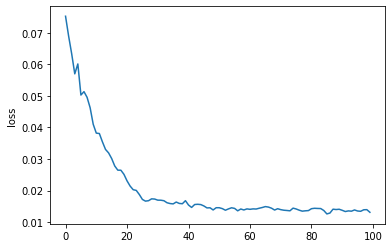

In [4]:
plt.plot(list(range(len(loss_arr))),loss_arr)
plt.ylabel('loss')
plt.show()

In [5]:
checkpoint = {'model': QLearning(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict(),
             }

torch.save(checkpoint, '/content/drive/My Drive/Colab Notebooks/checkpoint.pth')
'''
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model
'''

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type QLearning. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


"\ndef load_checkpoint(filepath):\n    checkpoint = torch.load(filepath)\n    model = checkpoint['model']\n    model.load_state_dict(checkpoint['state_dict'])\n    for parameter in model.parameters():\n        parameter.requires_grad = False\n\n    model.eval()\n    return model\n"